# DEEP CNN

In [107]:
import tensorflow as tf
import os

In [108]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [109]:
tf.config.list_physical_devices('GPU')

[]

# REMOVE DODGY IMAGES

In [110]:
import cv2
import imghdr

In [111]:
data_dir = "D:\Z\Deep_Learning\ImageClassification-main\data" 

In [112]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [113]:
os.listdir("D:\Z\Deep_Learning\ImageClassification-main\data")

['happy', 'sad']

In [114]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# LOAD DATA

In [115]:
import numpy as np
from matplotlib import pyplot as plt

In [116]:
data = tf.keras.utils.image_dataset_from_directory('D:\Z\Deep_Learning\ImageClassification-main\data')

Found 305 files belonging to 2 classes.


In [117]:
data_iterator = data.as_numpy_iterator()

In [118]:
batch = data_iterator.next()

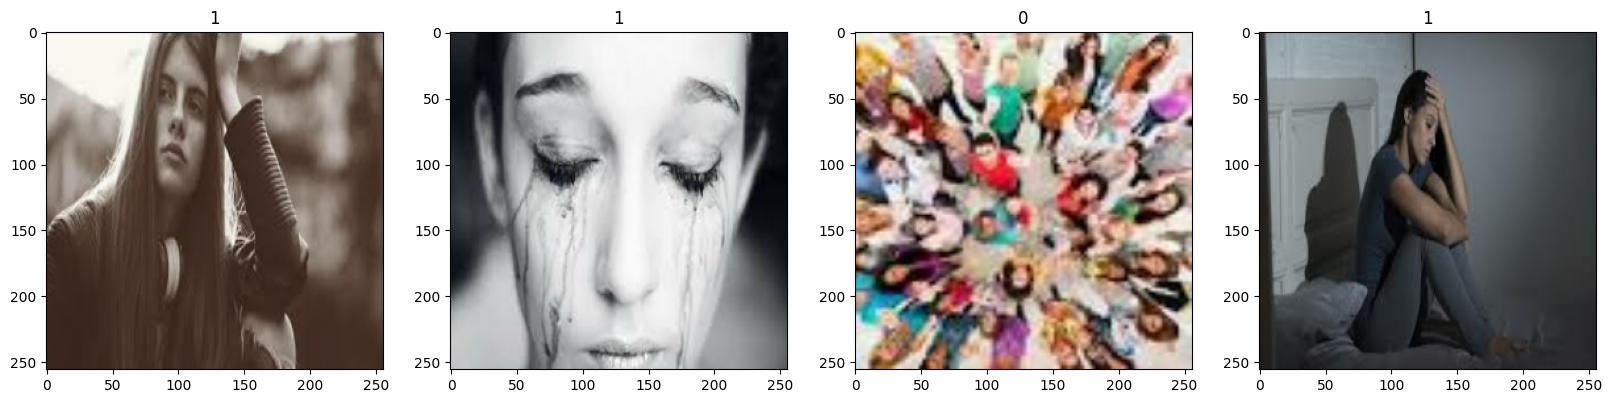

In [119]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [120]:
data = data.map(lambda x,y: (x/255, y))

In [121]:
data.as_numpy_iterator().next()

(array([[[[0.9633986 , 0.97057015, 0.9279666 ],
          [0.9032169 , 0.89738846, 0.8344357 ],
          [0.9084436 , 0.92212313, 0.8446982 ],
          ...,
          [0.74148434, 0.8252252 , 0.424375  ],
          [0.74702054, 0.7391774 , 0.68317276],
          [0.7635748 , 0.7945953 , 0.6210273 ]],
 
         [[0.9912684 , 0.99215686, 0.98164827],
          [0.86848956, 0.8763327 , 0.72451836],
          [0.9773546 , 0.9432415 , 0.94987   ],
          ...,
          [0.7404182 , 0.8060126 , 0.6893887 ],
          [0.71641886, 0.75265014, 0.7070524 ],
          [0.7578732 , 0.80209863, 0.75366086]],
 
         [[0.99196076, 0.99588233, 0.9760784 ],
          [0.9209897 , 0.94153196, 0.8370038 ],
          [0.9638331 , 0.9619873 , 0.9157865 ],
          ...,
          [0.8289981 , 0.82450217, 0.8571386 ],
          [0.764038  , 0.790475  , 0.78025895],
          [0.8587776 , 0.8503921 , 0.8542555 ]],
 
         ...,
 
         [[0.467765  , 0.56910235, 0.38170955],
          [0.33577

In [122]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [123]:
train_size

7

In [124]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [125]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [127]:
model = Sequential()

In [128]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# TRAIN THE MODEL

In [131]:
logdir='logs'

In [132]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [133]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 0.8873 - accuracy: 0.4866 - val_loss: 0.7634 - val_accuracy: 0.3906
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 0.6572 - accuracy: 0.6339 - val_loss: 0.5922 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.6138 - accuracy: 0.6741 - val_loss: 0.5533 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 8s 971ms/step - loss: 0.5173 - accuracy: 0.7589 - val_loss: 0.5777 - val_accuracy: 0.6719
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.4772 - accuracy: 0.7679 - val_loss: 0.3477 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.4305 - accuracy: 0.8304 - val_loss: 0.4217 - val_accuracy: 0.7812
Epoch 7/20
7/7 [==============================] - 8s 974ms/step - loss: 0.3478 - accuracy: 0.8795 - val_loss: 0.3486 - val_accuracy: 0.8125
Epoch 8/20
7/7 [==================

# EVALUATE

In [134]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [135]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [136]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 179ms/step


In [137]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# TEST

In [138]:
import cv2

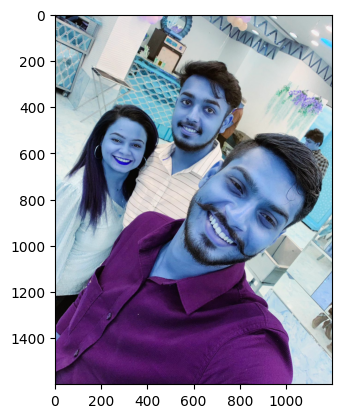

In [140]:
img = cv2.imread('IMG-20220628-WA0027.jpg')
plt.imshow(img)
plt.show()

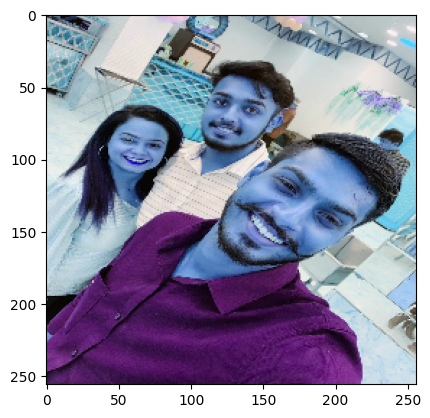

In [141]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [142]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [143]:
yhat

array([[0.87950283]], dtype=float32)

In [144]:
if yhat > 0.5: 
    print(f'Predicted class is HAPPY')
else:
    print(f'Predicted class is SAD')


Predicted class is HAPPY
